In [2]:
import pandas as pd
import numpy as np

# Carregar o dataset
df = pd.read_csv('/adult.csv')

# Substituir '?' por NaN para identificar valores ausentes
df.replace(' ?', np.nan, inplace=True)

# Mostrar quantidade de valores ausentes por coluna
print("Valores ausentes por coluna antes da limpeza:")
print(df.isnull().sum())

# Remover linhas com qualquer valor ausente
df.dropna(inplace=True)
#df_raw = df.copy()
# Verificar dimensões após remoção de valores ausentes
print("\nDimensões após limpeza:", df.shape)


Valores ausentes por coluna antes da limpeza:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Dimensões após limpeza: (32561, 15)


In [3]:
from sklearn.preprocessing import StandardScaler

# Identificar colunas categóricas e numéricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('income')  # não codificar a coluna alvo
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-Hot Encoding nas colunas categóricas
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separar variáveis preditoras (X) e alvo (y)
X = df_encoded.drop('income', axis=1)
y = df_encoded['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Normalizar apenas as colunas numéricas
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [4]:
from sklearn.model_selection import train_test_split

# Dividir dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Inicializar modelos
tree_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Treinar modelos
tree_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Modelo: Árvore de Decisão
 Acurácia:  0.8190
 Precisão:  0.6224
 Recall:    0.6214
 F1-score:  0.6219



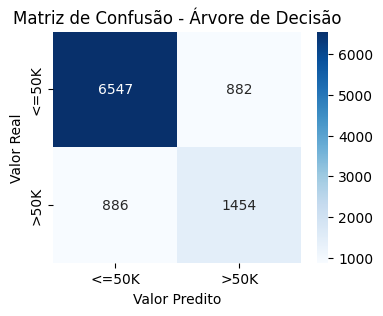

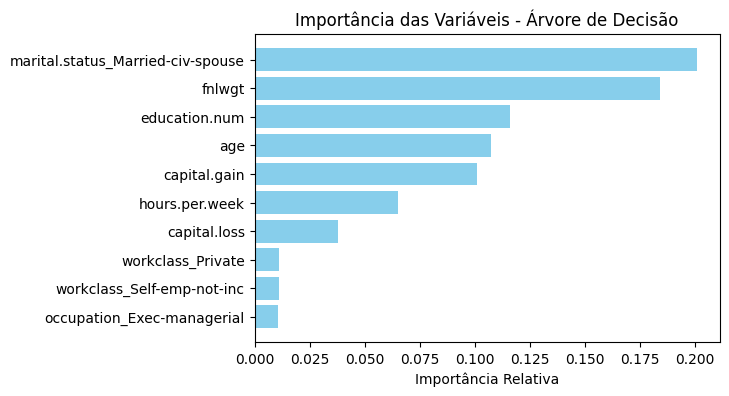

Modelo: Random Forest
 Acurácia:  0.8544
 Precisão:  0.7342
 Recall:    0.6150
 F1-score:  0.6693



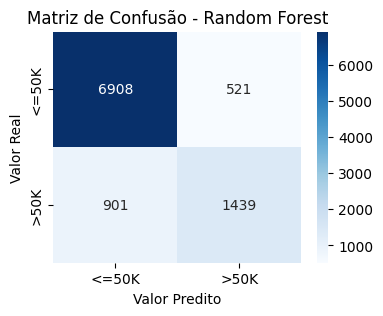

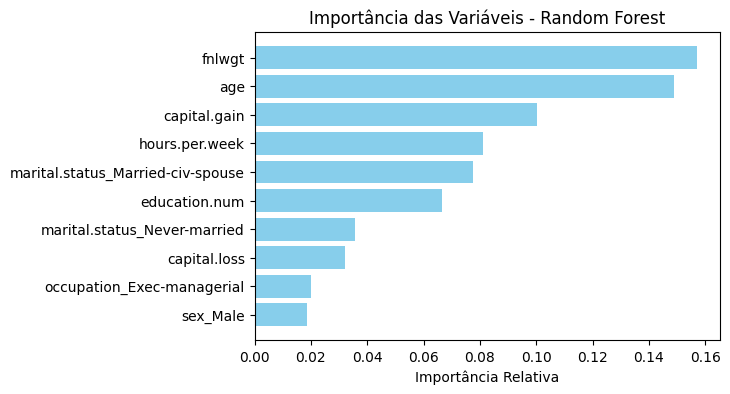

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Previsões dos modelos no conjunto de teste
y_pred_tree = tree_clf.predict(X_test)
y_pred_rf   = rf_clf.predict(X_test)

# Função para calcular métricas e plotar resultados
def avaliar_modelo(nome, y_true, y_pred, modelo):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Modelo: {nome}")
    print(f" Acurácia:  {acc:.4f}")
    print(f" Precisão:  {prec:.4f}")
    print(f" Recall:    {rec:.4f}")
    print(f" F1-score:  {f1:.4f}\n")

    # Matriz de Confusão
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K','>50K'], yticklabels=['<=50K','>50K'])
    plt.title(f"Matriz de Confusão - {nome}")
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Predito')
    plt.show()

    # Importância das Variáveis
    importances = modelo.feature_importances_
    # Seleciona as 10 variáveis mais importantes
    indices = np.argsort(importances)[-10:]
    plt.figure(figsize=(6,4))
    plt.title(f"Importância das Variáveis - {nome}")
    plt.barh(range(len(indices)), importances[indices], color='skyblue')
    plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
    plt.xlabel('Importância Relativa')
    plt.show()

# Avaliar Árvore de Decisão
avaliar_modelo("Árvore de Decisão", y_test, y_pred_tree, tree_clf)

# Avaliar Random Forest
avaliar_modelo("Random Forest", y_test, y_pred_rf, rf_clf)


# RASCUNHO

In [8]:
# !pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00


In [9]:
# import category_encoders as ce


In [10]:
# # === OTIMIZAÇÃO RÁPIDA DE F1 COM CÓDIGO DRY ===

# ###from imblearn.over_sampling import SMOTE
# from imblearn.combine import SMOTETomek
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score, f1_score,
#     confusion_matrix
# )
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import precision_recall_curve
# from xgboost import XGBClassifier

# # 1) Oversampling com SMOTE
# ###sm = SMOTE(random_state=42)
# sm = SMOTETomek(random_state=42, sampling_strategy='auto')
# X_res, y_res = sm.fit_resample(X_train, y_train)
# print("Distribuição pós-SMOTE:", np.bincount(y_res))



# # após SMOTETomek, antes do split:


# # definir colunas de alta cardinalidade
# high_card_cols = ['occupation','native-country']
# te = ce.TargetEncoder(cols=high_card_cols)
# X_res = te.fit_transform(X_res, y_res)
# X_test = te.transform(X_test)



# # 2) Configuração de modelos e parâmetros
# model_configs = {
#     'Árvore': {
#         'est': DecisionTreeClassifier(
#             random_state=42, class_weight='balanced'),
#     'params': {
#             'max_depth': [None, 8, 16],
#             'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 2, 4]
#        }
#     },
#     'RandomForest': {
#         'est': RandomForestClassifier(
#             random_state=42, class_weight='balanced'),
#         'params': {
#             'n_estimators': [100, 200, 300],
#             'max_depth': [None, 15, 30],
#             'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 2, 4]
#         }
#     },
#         'XGBoost': {
#         'est': XGBClassifier(
#             use_label_encoder=False,
#             eval_metric='logloss',
#             scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),
#             random_state=42
#         ),
#         'params': {
#             'n_estimators': [100, 200],
#             'max_depth': [4, 6, 8],
#             'learning_rate': [0.01, 0.1],
#             'subsample': [0.8, 1.0]
#         }
#     }
# }

# best_models = {}
# for name, cfg in model_configs.items():
#     print(f"\nBuscando melhor {name}…")
#     rnd = RandomizedSearchCV(
#         estimator=cfg['est'],
#         param_distributions=cfg['params'],
#         n_iter=12, cv=3, scoring='f1',
#         n_jobs=-1, random_state=42, verbose=0
#     )
#     rnd.fit(X_res, y_res)
#     best_models[name] = rnd.best_estimator_
#     print(f" {name} params:", rnd.best_params_)

# # 3) Ensemble Soft Voting
# ensemble = VotingClassifier(
#     estimators=list(best_models.items()),
#     voting='soft', n_jobs=-1
# )
# ensemble.fit(X_res, y_res)
# best_models['Ensemble'] = ensemble

# ####
# from sklearn.calibration import CalibratedClassifierCV

# for name in ['Árvore','RandomForest']:
#     base = best_models[name]
#     calib = CalibratedClassifierCV(base, cv='prefit', method='isotonic')
#     calib.fit(X_res, y_res)
#     best_models[name] = calib
# #####

# # 4) Função genérica de avaliação
# # def avaliar_modelo(name, model, X, y, feat_names):
# #     # Previsão (para ensemble usamos threshold padrão 0.5)
# #     y_pred = model.predict(X)

# def avaliar_modelo(name, model, X, y, feat_names):
#     # 1) prever probabilidades
#     probs = model.predict_proba(X)[:,1]
#     # 2) achar melhor threshold para F1
#     precision, recall, thresh = precision_recall_curve(y, probs)
#     f1_scores = 2 * precision * recall / (precision + recall + 1e-9)
#     best_idx = np.argmax(f1_scores)
#     best_t = thresh[best_idx]
#     # 3) classificação final
#     y_pred = (probs >= best_t).astype(int)
#     # restante igual: calcular métricas, plotar matriz e importâncias...
#     ...

#     # Métricas
#     acc  = accuracy_score(y, y_pred)
#     prec = precision_score(y, y_pred)
#     rec  = recall_score(y, y_pred)
#     f1   = f1_score(y, y_pred)
#     print(f"\n=== {name} ===")
#     print(f"Acurácia: {acc:.3f}  Precisão: {prec:.3f}  Recall: {rec:.3f}  F1: {f1:.3f}")
#     # Matriz de Confusão
#     cm = confusion_matrix(y, y_pred)
#     plt.figure(figsize=(4,3))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=['<=50K','>50K'],
#                 yticklabels=['<=50K','>50K'])
#     plt.title(f"Matriz - {name}")
#     plt.xlabel('Predito'); plt.ylabel('Real')
#     plt.show()
#     # Importâncias, se houver
#     if hasattr(model, 'feature_importances_'):
#         imp = model.feature_importances_
#         idx = np.argsort(imp)[-10:]
#         plt.figure(figsize=(6,4))
#         plt.barh(np.arange(len(idx)), imp[idx], edgecolor='k')
#         plt.yticks(np.arange(len(idx)), [feat_names[i] for i in idx])
#         plt.title(f"Top 10 Features - {name}")
#         plt.xlabel('Importância Relativa')
#         plt.show()

# # 5) Avaliar todos
# for nome, mdl in best_models.items():
#     avaliar_modelo(nome, mdl, X_test, y_test, X.columns)


Distribuição pós-SMOTE: [16913 16913]


ValueError: X does not contain the columns listed in cols